<a href="https://colab.research.google.com/github/cherest555/CLASS_AI4DL/blob/main/AI%EB%94%A5%EB%9F%AC%EB%8B%9D_EDA_%EC%A0%84%EC%B2%98%EB%A6%AC%EA%B9%8C%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#라이브러리 설치,import, 데이터 준비

In [1]:
#라이브러리 및 패키지 불러오기

!pip install keras_preprocessing
!pip install emoji
!pip install autocorrect

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
import string
from collections import Counter
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from nltk.util import ngrams
from collections import  Counter
plt.style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences #keras_preprocessing

from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

import os 
import warnings
warnings.filterwarnings(action  = 'ignore')

from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy,BinaryCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy,BinaryAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from autocorrect import Speller 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=9d3fda0780a40842a5bf75dc99b458916060ea99968a85ca03f75f73b1dd855c
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha25

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


-

In [2]:
#train.csv와 test.csv 파일에서 데이터 불러오기 및 데이터 확인

from google.colab import drive
drive.mount('/content/drive')

df_train = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ai4dl/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ai4dl/test.csv')
df_sample = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ai4dl/sample_submission.csv')

Mounted at /content/drive


In [3]:
#df_train, df_test 데이터셋의 행과 열 수 출력

print('train 데이터셋에는 {}개의 행과 {}개의 열이 있다.'.format(df_train.shape[0], df_train.shape[1]))
print('test 데이터셋에는 {}개의 행과 {}개의 열이 있다.'.format(df_test.shape[0], df_test.shape[1]))

train 데이터셋에는 7613개의 행과 5개의 열이 있다.
test 데이터셋에는 3263개의 행과 4개의 열이 있다.


In [4]:
print(df_train.info())

print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [5]:
print(df_train.head(5).to_string())
print(df_train.tail(5).to_string())

print(df_test.head(5).to_string())
print(df_test.tail(5).to_string())

   id keyword location                                                                                                                                   text  target
0   1     NaN      NaN                                                                  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all       1
1   4     NaN      NaN                                                                                                 Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected       1
3   6     NaN      NaN                                                                      13,000 people receive #wildfires evacuation orders in California        1
4   7     NaN      NaN                                               Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school        1
    

-

In [6]:
#각 클래스별 예제 수 추출

Real_len = df_train[df_train['target'] == 1].shape[0]
print(Real_len)

Not_len = df_train[df_train['target'] == 0].shape[0]
print(Not_len)

3271
4342


# EDA

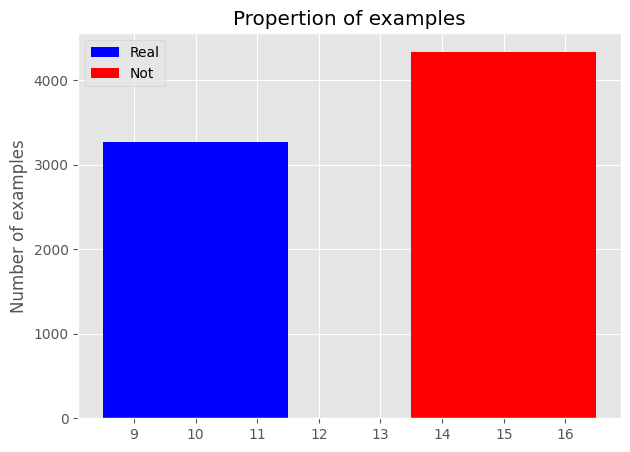

In [7]:
#3개 클래스의 예제 수를 막대 그래프로 그리기

plt.rcParams['figure.figsize'] = (7, 5)

plt.bar(10, Real_len, 3, label="Real", color='blue')
plt.bar(15, Not_len, 3, label="Not", color='red')

plt.legend()

plt.ylabel('Number of examples')
plt.title('Propertion of examples')

plt.show()

-

In [8]:
#결측치 확인

print("Number of missing values in 'keyword' column in training set:", df_train['keyword'].isnull().sum())
print("Number of missing values in 'location' column in training set:", df_train['location'].isnull().sum())
print("Number of missing values in 'keyword' column in test set:", df_test['keyword'].isnull().sum())
print("Number of missing values in 'location' column in test set:", df_test['location'].isnull().sum())

Number of missing values in 'keyword' column in training set: 61
Number of missing values in 'location' column in training set: 2533
Number of missing values in 'keyword' column in test set: 26
Number of missing values in 'location' column in test set: 1105


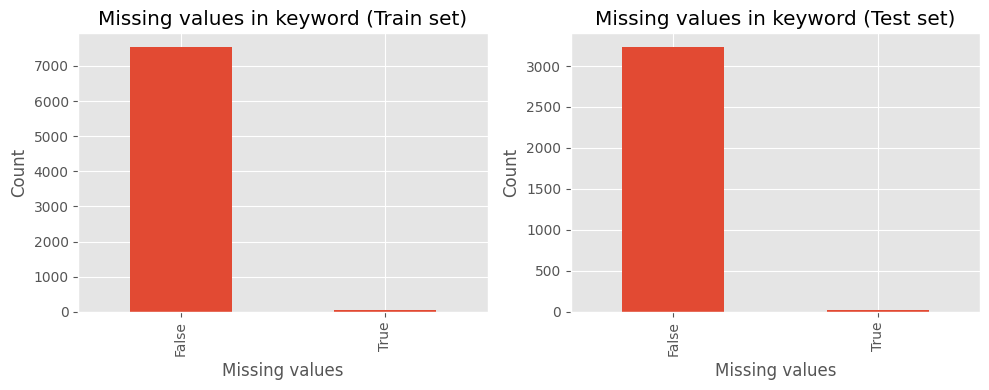

In [9]:
#결측치 시각화

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df_train['keyword'].isnull().value_counts().plot(kind='bar', ax=axes[0])
df_test['keyword'].isnull().value_counts().plot(kind='bar', ax=axes[1])

axes[0].set_title('Missing values in keyword (Train set)')
axes[0].set_xlabel('Missing values')
axes[0].set_ylabel('Count')
axes[1].set_title('Missing values in keyword (Test set)')
axes[1].set_xlabel('Missing values')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()

-

In [10]:
#트윗 텍스트의 길이를 계산하는 함수 정의

def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [11]:
#트윗 데이터에 길이 열 추가
df_train['length'] = df_train['text'].apply(length)

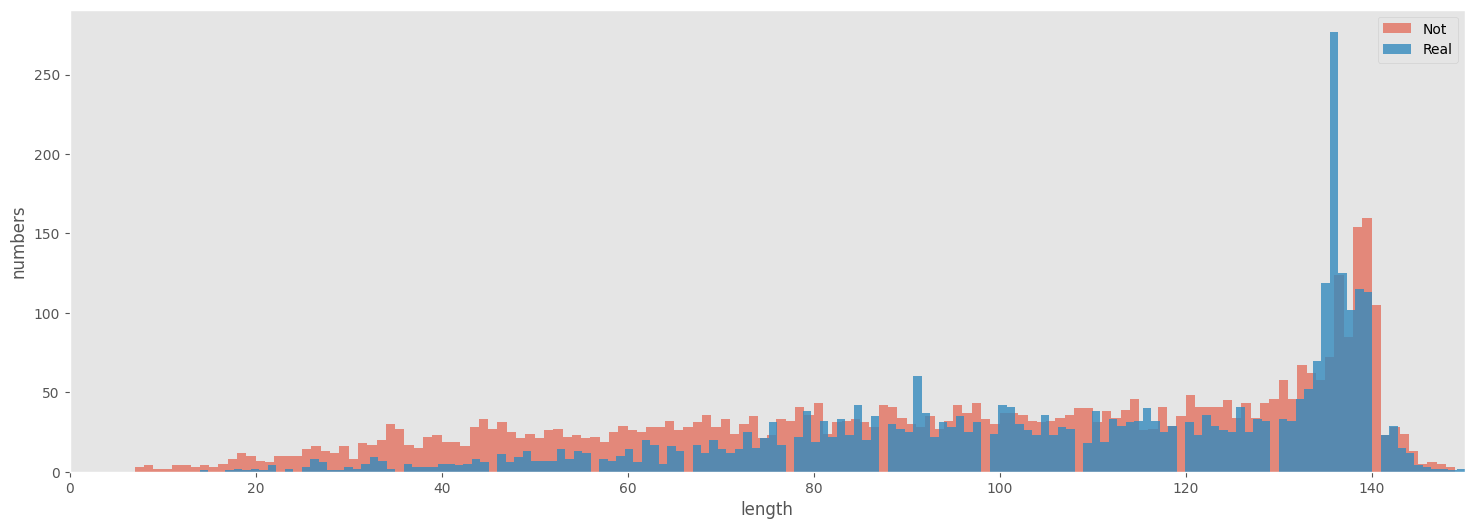

In [12]:
#클래스별 텍스트 길이 히스토그램 그리기

plt.rcParams['figure.figsize'] = (18.0, 6.0)

bins = 150

plt.hist(df_train[df_train['target'] == 0]['length'], alpha=0.6, bins=bins, label='Not')
plt.hist(df_train[df_train['target'] == 1]['length'], alpha=0.8, bins=bins, label='Real')

plt.xlabel('length')
plt.ylabel('numbers')

plt.legend(loc='upper right')

plt.xlim(0, 150)

plt.grid()

plt.show()

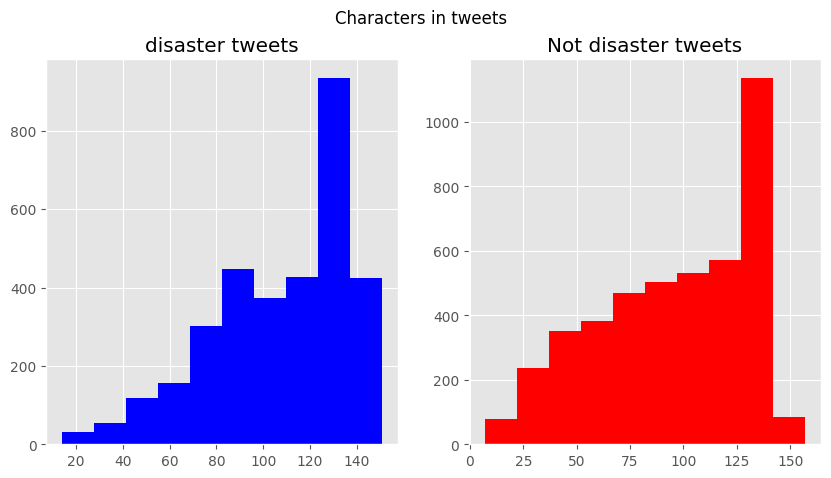

In [13]:
#클래스별 트윗의 문자 수 히스토그램 그리기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len = df_train[df_train['target'] == 1]['text'].str.len()
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')

tweet_len = df_train[df_train['target'] == 0]['text'].str.len()
ax2.hist(tweet_len, color='red')
ax2.set_title('Not disaster tweets')

fig.suptitle('Characters in tweets')

plt.show()

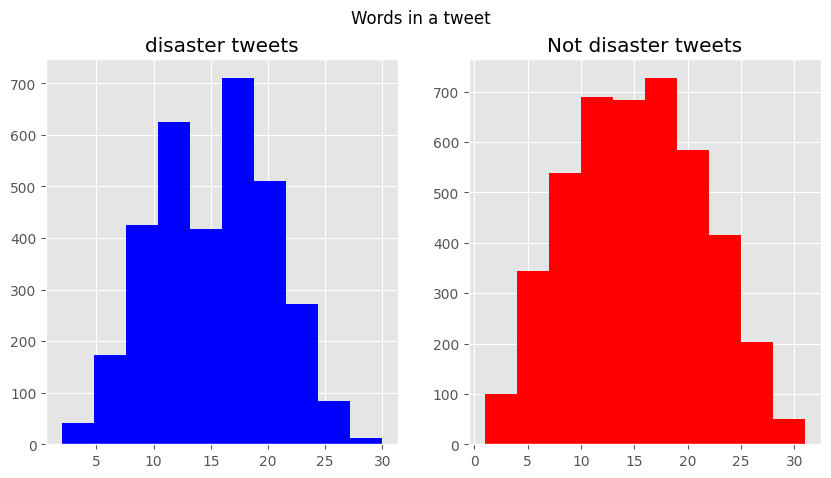

In [14]:
#클래스별 트윗의 단어 수 히스토그램 그리기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len = df_train[df_train['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
ax1.set_title('disaster tweets')

tweet_len = df_train[df_train['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='red')
ax2.set_title('Not disaster tweets')

fig.suptitle('Words in a tweet')

plt.show()

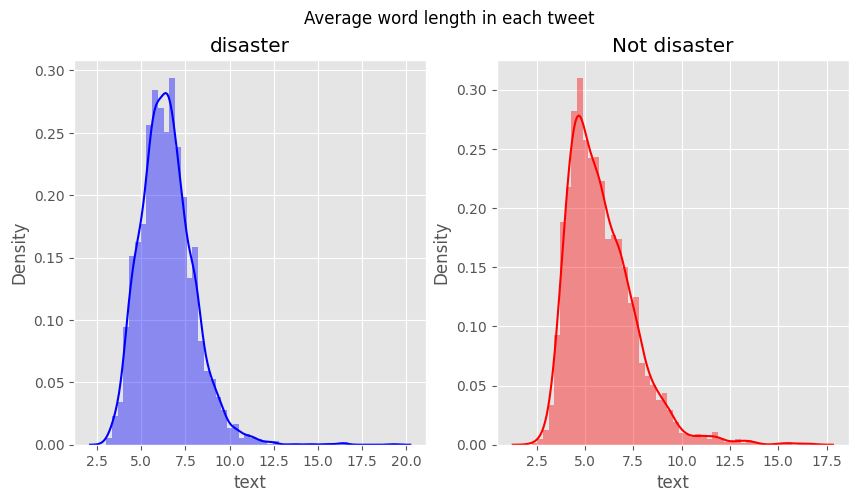

In [15]:
#클래스별 트윗의 평균 단어 길이를 그래프로 그리기

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

word = df_train[df_train['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax1, color='blue')
ax1.set_title('disaster')

word = df_train[df_train['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax=ax2, color='red')
ax2.set_title('Not disaster')

fig.suptitle('Average word length in each tweet')

plt.show()

-

In [16]:
#불용어(stopwords) 리스트를 생성

stop = stopwords.words('english')

<BarContainer object of 10 artists>

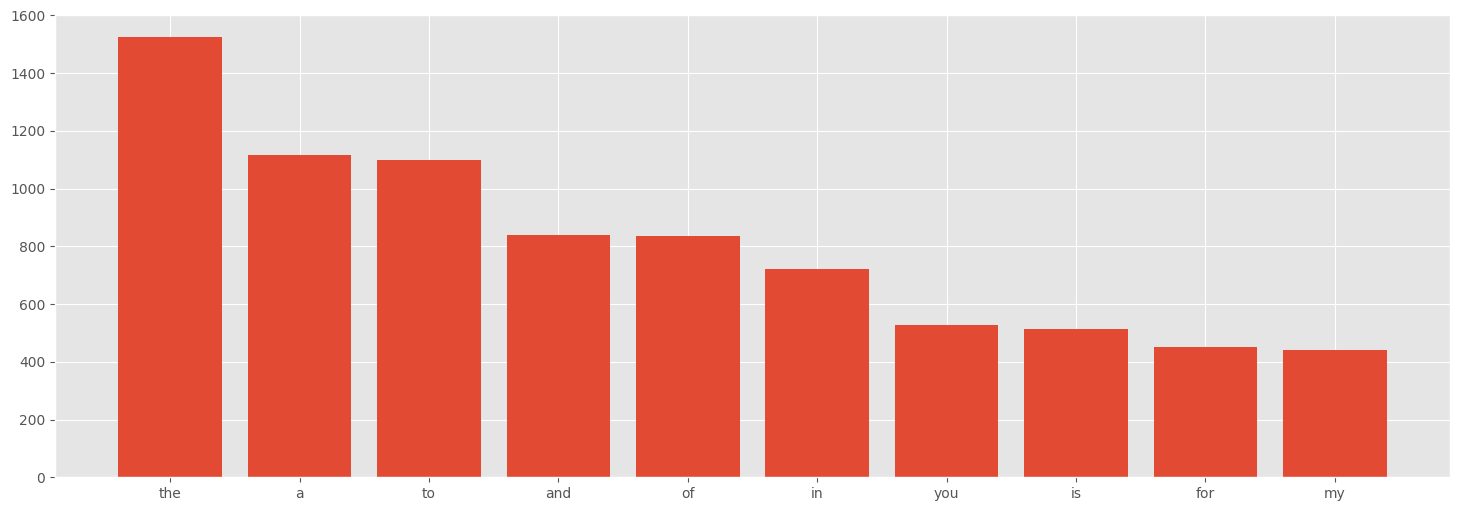

In [17]:
#비재해 트윗에서 가장 자주 등장하는 불용어 상위 10개 막대 그래프

def create_corpus(target):
    corpus=[]
    
    for x in df_train[df_train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

x,y=zip(*top)

plt.bar(x,y)

<BarContainer object of 10 artists>

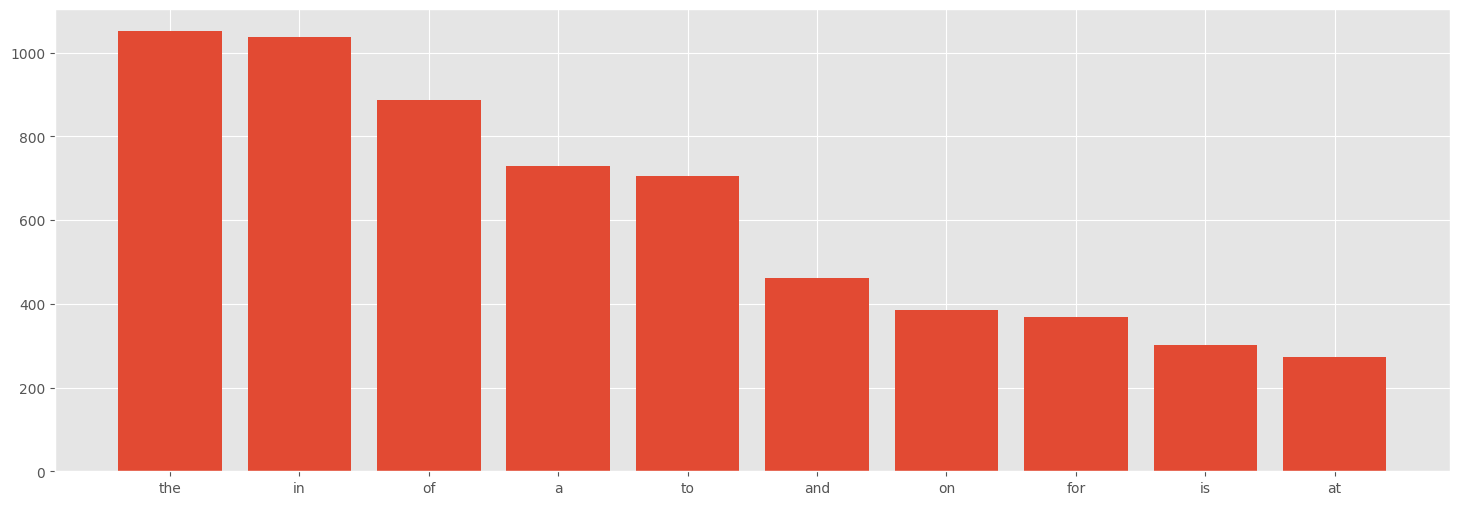

In [18]:
#재해 트윗에서 가장 자주 등장하는 불용어 상위 10개 막대 그래프

corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)

plt.bar(x,y)

<BarContainer object of 18 artists>

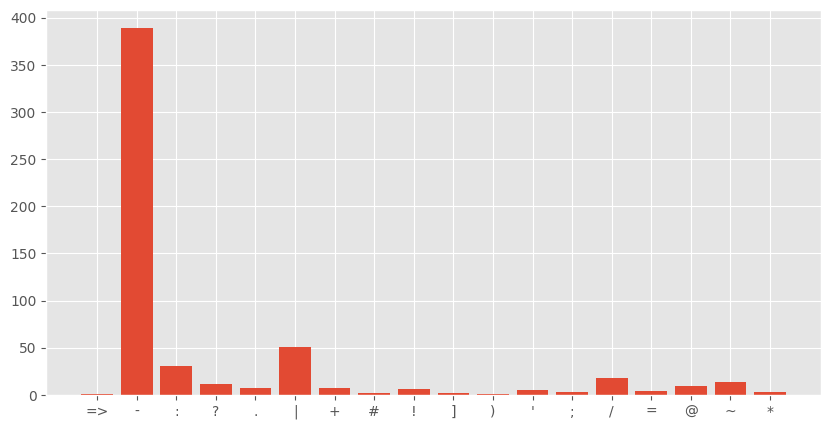

In [19]:
#특수문자의 등장 빈도 막대 그래프

plt.figure(figsize=(10,5))

corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())

plt.bar(x,y)

<BarContainer object of 20 artists>

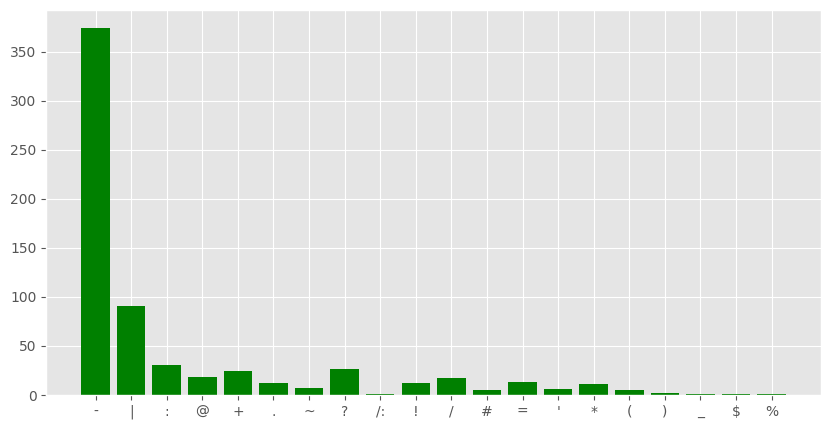

In [20]:
#특수문자의 등장 빈도 막대 그래프

plt.figure(figsize=(10,5))

corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())

plt.bar(x,y,color='green')

-

In [21]:
#'keyword', 'ㅣocation' 열의 고유 값 개수 출력

print(f'Number of unique values in keyword = {df_train["keyword"].nunique()} (Training) - {df_test["keyword"].nunique()} (Test)')
print(f'Number of unique values in location = {df_train["location"].nunique()} (Training) - {df_test["location"].nunique()} (Test)')

Number of unique values in keyword = 221 (Training) - 221 (Test)
Number of unique values in location = 3341 (Training) - 1602 (Test)


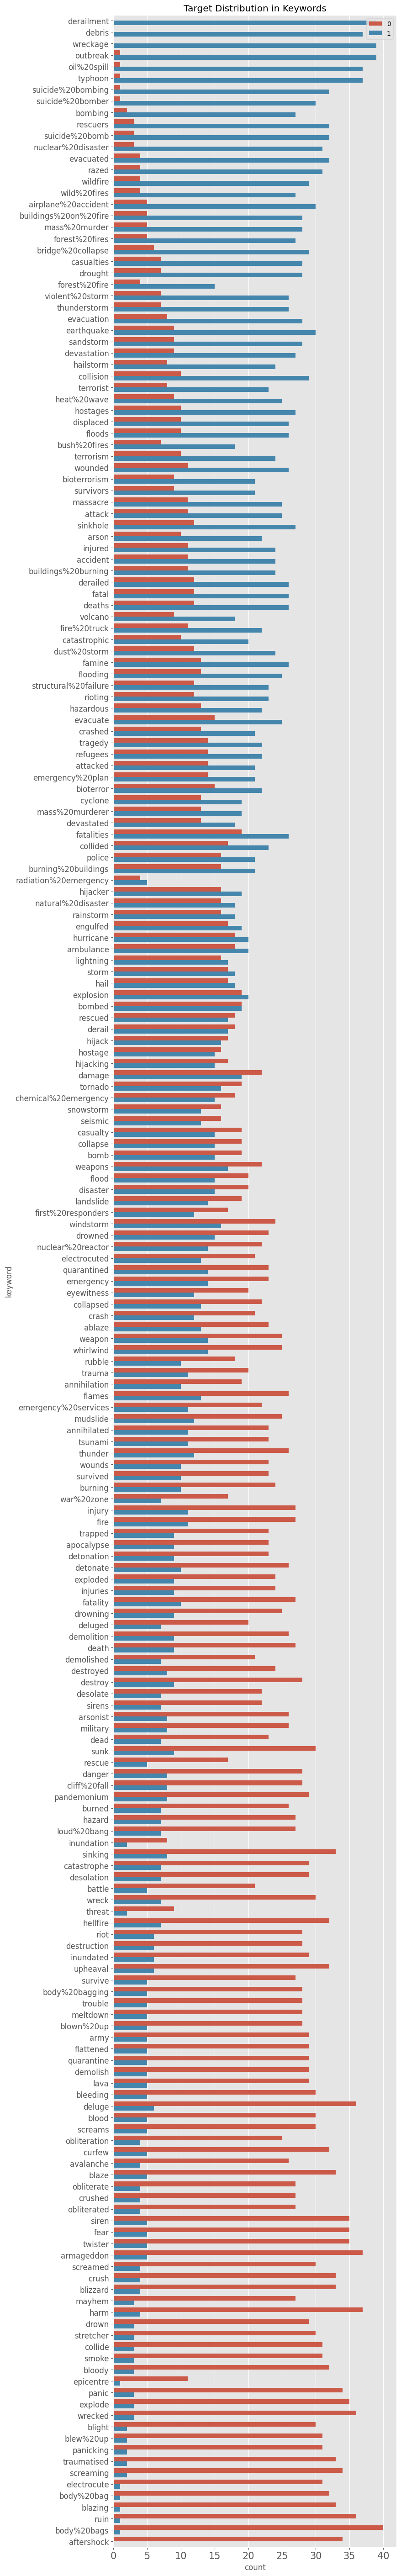

In [22]:
#'keyword' 열의 평균 'target' 값을 기준으로 키워드의 타겟 분포 그래프를 그리기

df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

df_train.drop(columns=['target_mean'], inplace=True)

-

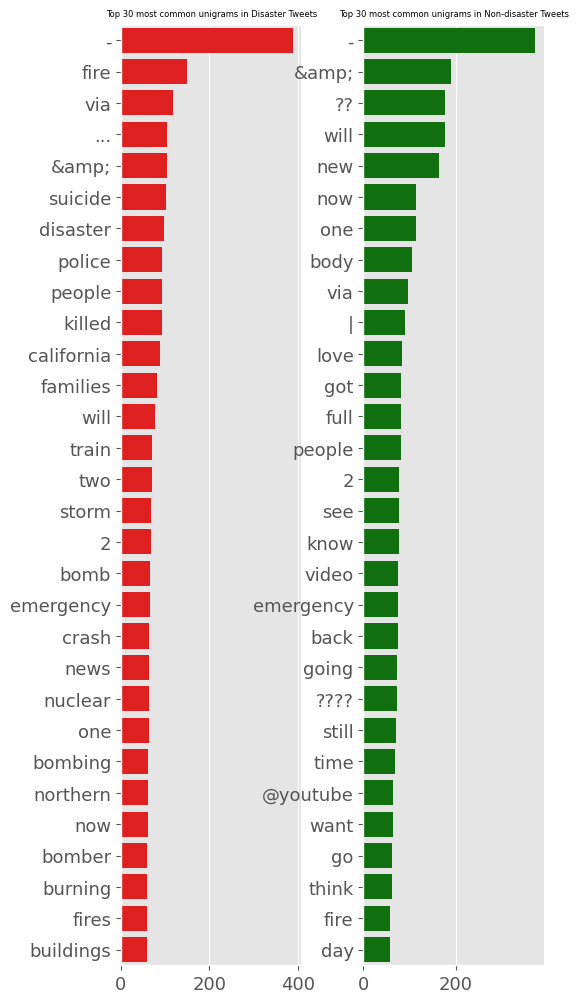

In [23]:
#가장 빈도가 높은 단어 상위 30개 막대 그래프

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 30

disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

DISASTER_TWEETS = df_train['target'] == 1

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(5, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_unigrams[0].values[:N], x=df_disaster_unigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_unigrams[0].values[:N], x=df_nondisaster_unigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common unigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common unigrams in Non-disaster Tweets', fontsize=6)

plt.show()

Text(0.5, 1.0, 'Top 30 most common bigrams in Non-disaster Tweets')

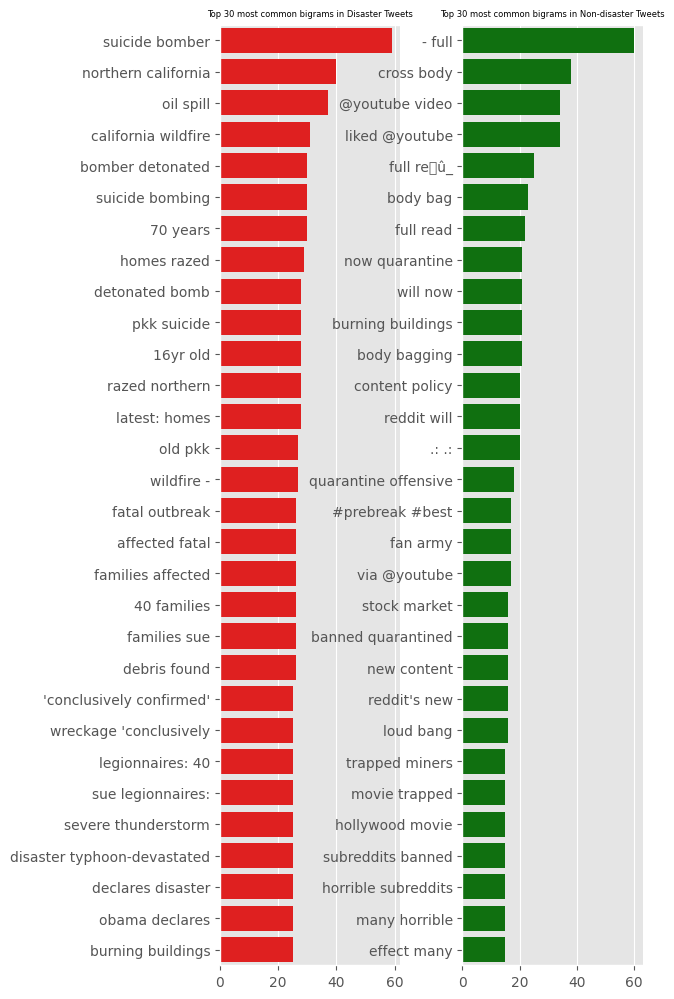

In [24]:
#가장 많이 등장하는 바이그램 단어 상위 30개 막대 그래프

disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(5, 10), dpi=100)
plt.tight_layout()

sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=6)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=6)

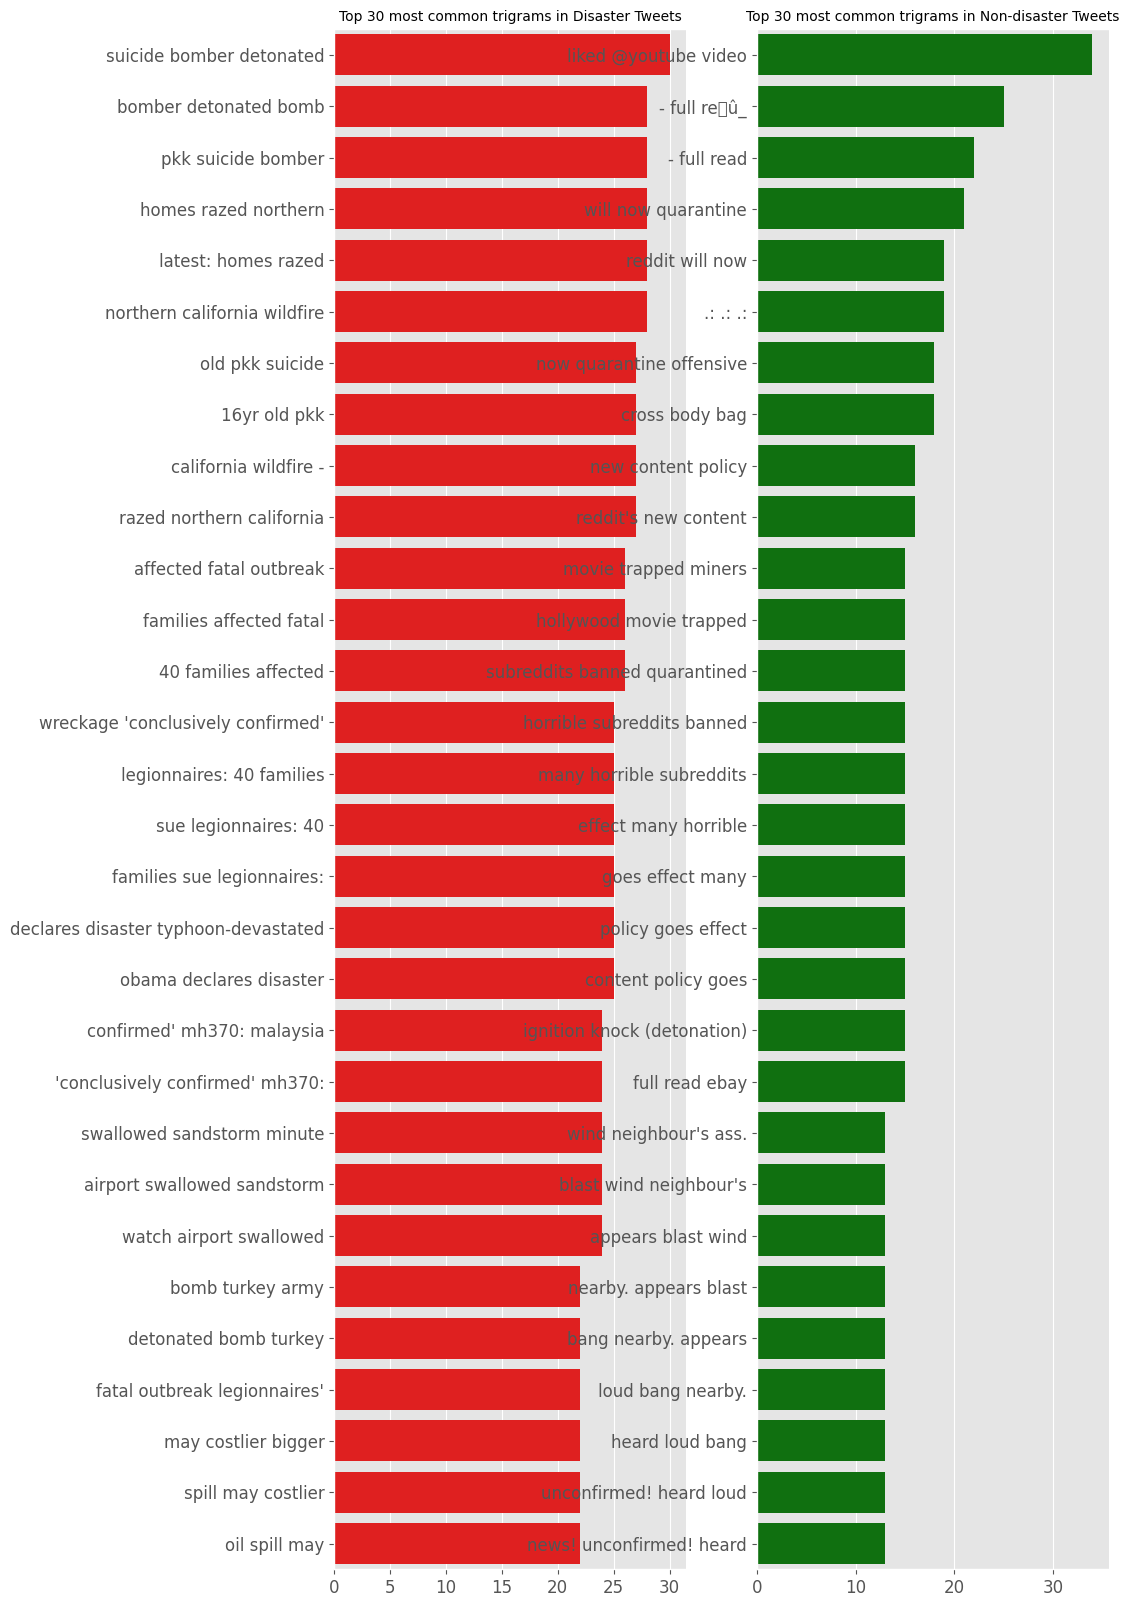

In [25]:
#가장 많이 등장하는 트리그램 단어 상위 30개 막대 그래프

disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

fig, axes = plt.subplots(ncols=2, figsize=(10, 20), dpi=100)

sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=10)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=10)

plt.show()

-

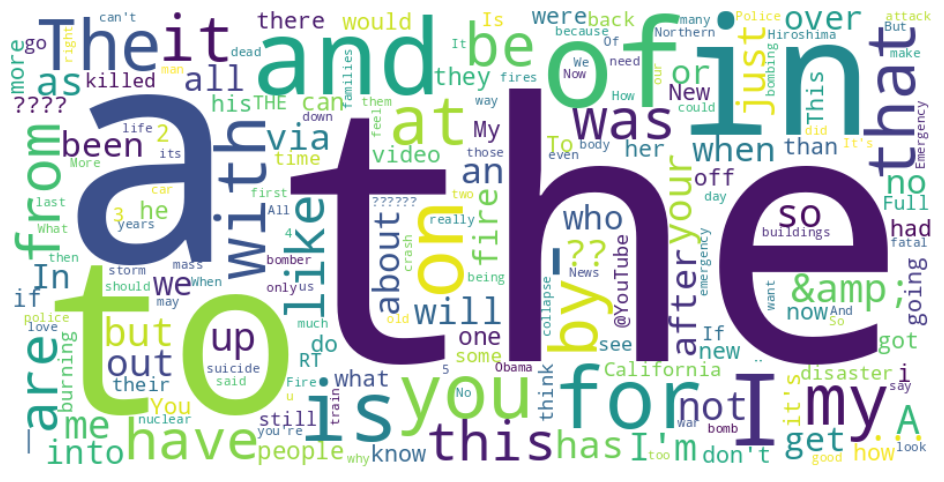

In [26]:
#단어 워드클라우드 시각화

word_counts = Counter(" ".join(df_train["text"]).split())
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

# 전처리

In [27]:
# URL 제거
def text_preproccessing_URL(df):  
    
    df = df.copy()
    
    def remove_URL(text):
        url = re.compile(r'https?://\S+|www\.\S+')
        return url.sub(r'',text)
    df['text']=df['text'].apply(lambda x : remove_URL(x))

    return df

df_train = text_preproccessing_URL(df_train)
df_test = text_preproccessing_URL(df_test)

In [28]:
# HTML 제거
def text_preproccessing_HTML(df):  
    
    df = df.copy()
    
    def remove_html(text):
        html=re.compile(r'<.*?>')
        return html.sub(r'',text)

    df['text']=df['text'].apply(lambda x : remove_html(x))

    return df

df_train = text_preproccessing_HTML(df_train)
df_test = text_preproccessing_HTML(df_test)   

In [29]:
# 구두점 제거
def text_preproccessing_PUNCT(df):  

    def remove_punct(text):
        table=str.maketrans('','',string.punctuation)
        return text.translate(table)

    df['text']=df['text'].apply(lambda x : remove_punct(x))

    return df

df_train = text_preproccessing_PUNCT(df_train)
df_test = text_preproccessing_PUNCT(df_test)   

In [43]:
# 이모지 제거
import emoji
def text_preproccessing_EMOGI(df):  
    
    df = df.copy()
    
    def remove_emoji(text):
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)

    df['text']=df['text'].apply(lambda x : remove_emoji(x))

    return df

df_train = text_preproccessing_EMOGI(df_train)
df_test = text_preproccessing_EMOGI(df_test)   

In [56]:
stop=set(stopwords.words('english'))

def text_preproccessing_STOPWORD(df):  
    
    df = df.copy()

    def remove_stopwords(x):
        return ' '.join([i for i in x.split() if i not in stop])

    df['text']=df['text'].apply(lambda x : remove_stopwords(x))

    return df

df_train = text_preproccessing_STOPWORD(df_train)
df_test = text_preproccessing_STOPWORD(df_test)

In [55]:
# 스펠링 확인
def text_preproccessing_SPELLCHECK(df):  
    
    df = df.copy()
    
    def remove_stopwords(x):
        return ' '.join([i for i in x.split() if i not in stop])

    df['text']=df['text'].apply(lambda x : remove_stopwords(x))

    return df

df_train = text_preproccessing_SPELLCHECK(df_train)
df_test = text_preproccessing_SPELLCHECK(df_test)

In [57]:
# 데이터 확인
df_train[1:20]

,id,keyword,location,text,target,length
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1,38
2,5,NaN,NaN,All residents asked shelter place notified off...,1,133
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1,65
4,7,NaN,NaN,Just got sent photo Ruby Alaska smoke wildfire...,1,88
5,8,NaN,NaN,RockyFire Update California Hwy 20 closed dire...,1,110
6,10,NaN,NaN,flood disaster Heavy rain causes flash floodin...,1,95
7,13,NaN,NaN,Im top hill I see fire woods,1,59
8,14,NaN,NaN,Theres emergency evacuation happening building...,1,79
9,15,NaN,NaN,Im afraid tornado coming area,1,52
10,16,NaN,NaN,Three people died heat wave far,1,43


In [58]:
df_test[1:20]

,id,keyword,location,text
1,2,NaN,NaN,Heard earthquake different cities stay safe ev...
2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
3,9,NaN,NaN,Apocalypse lighting Spokane wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 China Taiwan
5,12,NaN,NaN,Were shakingIts earthquake
6,21,NaN,NaN,Theyd probably still show life Arsenal yesterd...
7,22,NaN,NaN,Hey How
8,27,NaN,NaN,What nice hat
9,29,NaN,NaN,Fuck
10,30,NaN,NaN,No I dont like cold
